In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df =dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x)  if pd.notna(x) else x)

In [6]:
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [8]:
data = df_da_us['job_location'].value_counts().head(10).to_frame()

Text(0, 0.5, '')

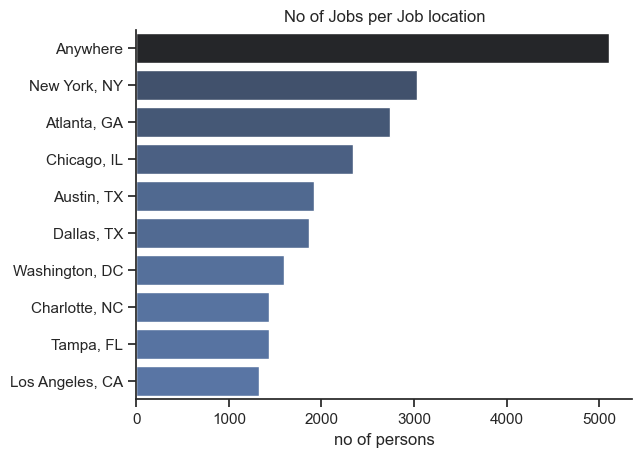

In [14]:
sns.set_theme(style= 'ticks')
sns.barplot(data =data,x='count',y='job_location',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title('No of Jobs per Job location')
plt.xlabel('no of persons')
plt.ylabel('')



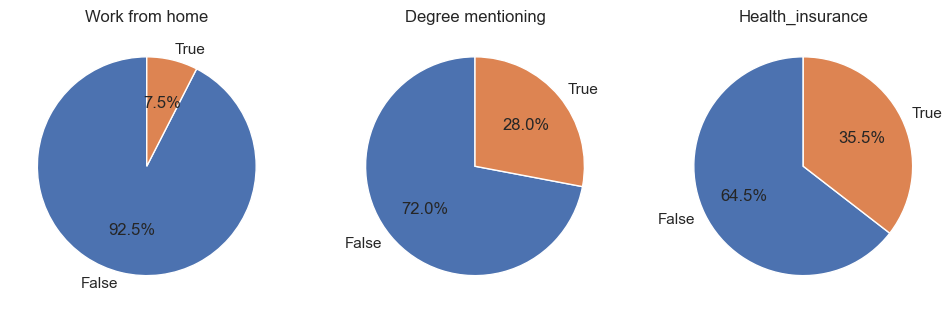

In [17]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches((12,5))
 
dict_columns ={
    'job_work_from_home' : 'Work from home',
    'job_no_degree_mention': 'Degree mentioning',
    'job_health_insurance' : 'Health_insurance'
  }
for i,(columns,title) in enumerate(dict_columns.items()):
    ax[i].pie(df_da_us[columns].value_counts(),startangle = 90,autopct='%1.1f%%',labels=['False','True'])
    ax[i].set_title(title) 
plt.show()

Text(0, 0.5, '')

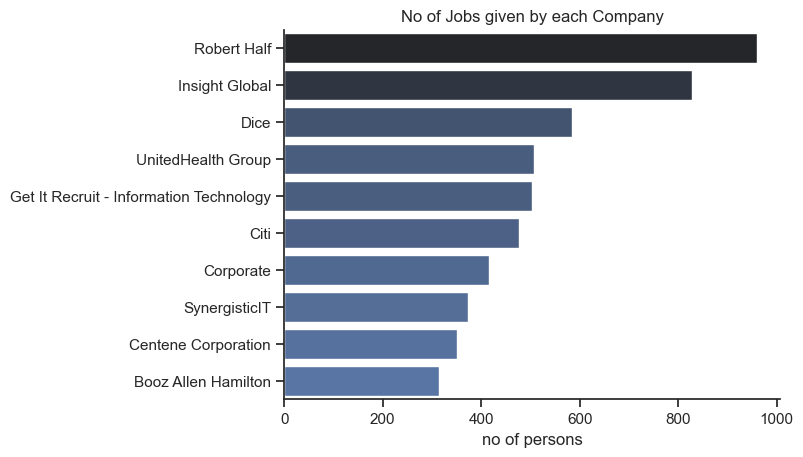

In [18]:
data = df_da_us['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style= 'ticks')
sns.barplot(data =data,x='count',y='company_name',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title('No of Jobs given by each Company')
plt.xlabel('no of persons')
plt.ylabel('')